In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
import nltk

In [52]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [53]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [54]:
df=df[['v2','v1']]

In [55]:
df

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [56]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [57]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [58]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [59]:
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [1]:
# adding more Data

In [60]:
df1=pd.read_csv('email.csv')
def text(text):  
    text = re.sub(r'Subject:', '', text)
    return text.lower()

In [61]:
df1['text1'] = df1['text'].apply(text)

In [62]:
df1=df1[['text1','spam']]

In [63]:
df1.rename(columns={'spam':'target','text1':'text'},inplace=True)

In [64]:
df2=pd.read_excel(r'C:\\Users\\HP\\Desktop\\Book3.xlsx')

In [2]:
#combine all the data 

In [65]:
data=pd.concat([df,df2,df1],axis=0,ignore_index=True)

In [66]:
data=data[['text','target']]

In [67]:
data.tail()

,text,target
8066,still wanna her ? : - ) you have not tried c...,1
8067,checking account update dear reader : we so...,1
8068,"no pills , no pumps - its the patch experien...",1
8069,you ' ve won ! confirmation number 567842 yo...,1
8070,returned mail : see transcript for details t...,1


In [68]:
data['target'].value_counts()

0    4825
1    3246
Name: target, dtype: int64

In [69]:
data.duplicated().sum()

439

In [70]:
data= data.drop_duplicates(keep='first')

In [71]:
data.duplicated().sum()

0

In [72]:
data.isnull().sum()

text      0
target    0
dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7632 entries, 0 to 8070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7632 non-null   object
 1   target  7632 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 178.9+ KB


In [74]:
data

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
8066,still wanna her ? : - ) you have not tried c...,1
8067,checking account update dear reader : we so...,1
8068,"no pills , no pumps - its the patch experien...",1
8069,you ' ve won ! confirmation number 567842 yo...,1


In [75]:
data.tail()

,text,target
8066,still wanna her ? : - ) you have not tried c...,1
8067,checking account update dear reader : we so...,1
8068,"no pills , no pumps - its the patch experien...",1
8069,you ' ve won ! confirmation number 567842 yo...,1
8070,returned mail : see transcript for details t...,1


In [76]:
data['target'].value_counts()

0    4516
1    3116
Name: target, dtype: int64

In [77]:
data['num_characters']=data['text'].apply(len)

In [78]:
# num of words
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [79]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [80]:
data.head()

,text,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [81]:
data.tail()

,text,target,num_characters,num_words,num_sentences
8066,still wanna her ? : - ) you have not tried c...,1,429,95,10
8067,checking account update dear reader : we so...,1,580,104,7
8068,"no pills , no pumps - its the patch experien...",1,350,78,7
8069,you ' ve won ! confirmation number 567842 yo...,1,435,86,4
8070,returned mail : see transcript for details t...,1,422,95,12


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

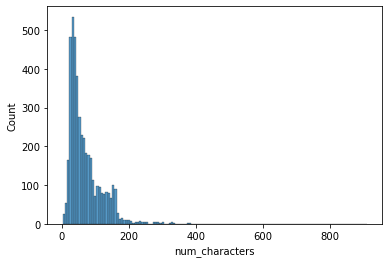

In [82]:
sns.histplot(data[data['target'] == 0]['num_characters'])

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

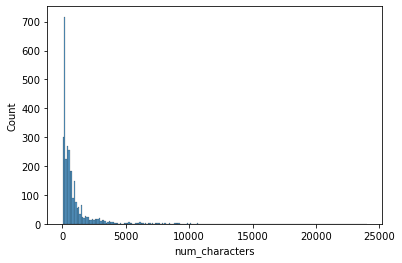

In [83]:
sns.histplot(data[data['target'] == 1]['num_characters'])

<AxesSubplot:xlabel='num_words', ylabel='Count'>

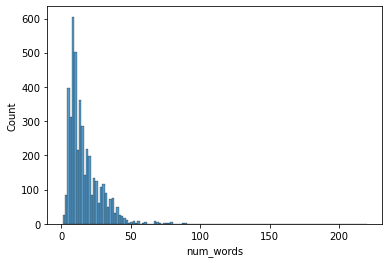

In [84]:
sns.histplot(data[data['target'] == 0]['num_words'])

<AxesSubplot:xlabel='num_words', ylabel='Count'>

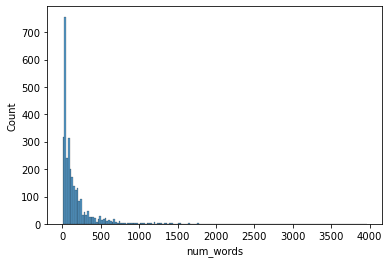

In [85]:
sns.histplot(data[data['target'] == 1]['num_words'])

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

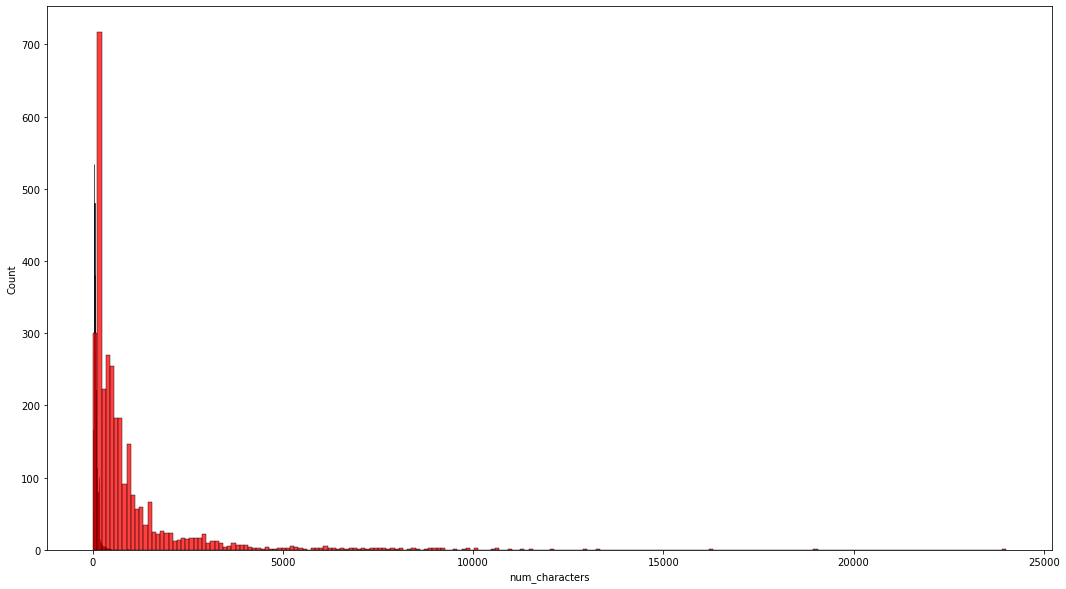

In [86]:
plt.figure(figsize=(18,10))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

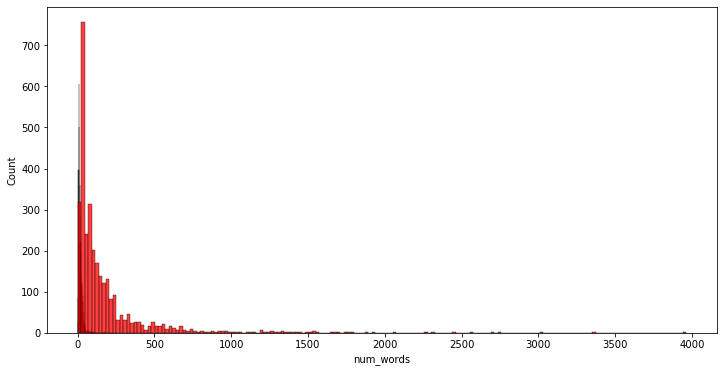

In [87]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

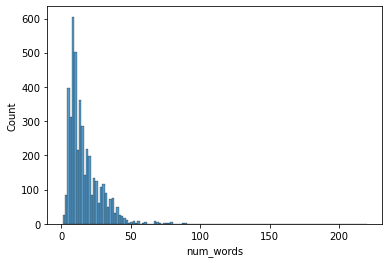

In [88]:
sns.histplot(data[data['target'] == 0]['num_words'])

<AxesSubplot:xlabel='num_words', ylabel='Count'>

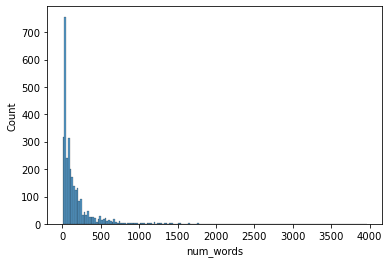

In [89]:
sns.histplot(data[data['target'] == 1]['num_words'])

In [90]:
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
data['text'] = data.text.astype(str)

In [92]:
def cleanText(text:str)-> str:
    """
    This function takes a text and clean it by removing
    1. Hastags and Mentions
    2. URLS
    3.Stopwords are removed
    4.lowers all the words in sentences
    """
    text = text.lower()
    hash_pattern  = re.findall("[#|@]\w+RT",text)
    for p in hash_pattern:
        text = text.replace(p,"")
    urls = re.findall("http[a-z:/0-9.]+",text)
    for u in urls:
        text = text.replace(u,"")
    text =re.findall("\w+",text)
    text = " ".join(text)
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return text

In [94]:
import string

In [95]:
data['text'] =  data['text'].apply(cleanText)


In [96]:
data.head(10)

,text,target,num_characters,num_words,num_sentences
0,go until jurong point crazy available only in ...,0,111,24,2
1,ok lar joking wif u oni,0,29,8,2
2,free entry in 2 a wkly comp to win fa cup fina...,1,155,37,2
3,u dun say so early hor u c already then say,0,49,13,1
4,nah i don t think he goes to usf he lives arou...,0,61,15,1
5,freemsg hey there darling it s been 3 week s n...,1,148,39,4
6,even my brother is not like to speak with me t...,0,77,18,2
7,as per your request melle melle oru minnaminun...,0,160,31,2
8,winner as a valued network customer you have b...,1,158,32,5
9,had your mobile 11 months or more u r entitled...,1,154,31,3


<AxesSubplot:xlabel='target', ylabel='count'>

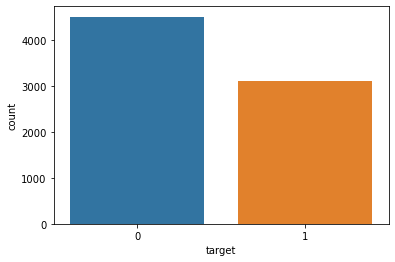

In [97]:
sns.countplot(x='target',data=data)

In [98]:
data['target'].value_counts()

0    4516
1    3116
Name: target, dtype: int64

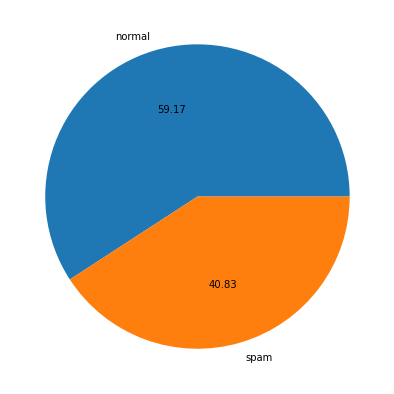

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.pie(data['target'].value_counts(), labels=['normal','spam'],autopct="%0.2f")
plt.show()

In [100]:
from collections import Counter
import matplotlib.pyplot as plt
spam_corpus= []
for msg in data[data['target']== 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [103]:
data.head()

,text,target,num_characters,num_words,num_sentences
0,go until jurong point crazy available only in ...,0,111,24,2
1,ok lar joking wif u oni,0,29,8,2
2,free entry in 2 a wkly comp to win fa cup fina...,1,155,37,2
3,u dun say so early hor u c already then say,0,49,13,1
4,nah i don t think he goes to usf he lives arou...,0,61,15,1


In [104]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import *
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,roc_auc_score

In [105]:
x = data.text
y = data.target

In [106]:
x

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
8066    still wanna her you have not tried cialls yet ...
8067    checking account update dear reader we sometim...
8068    no pills no pumps its the patch experience mor...
8069    you ve won confirmation number 567842 you are ...
8070    returned mail see transcript for details the o...
Name: text, Length: 7632, dtype: object

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
Tfidf_vect = TfidfVectorizer(min_df = 0.001)
Tfidf_vect.fit(x)
x_vec = Tfidf_vect.transform(x)

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x_vec,y,test_size=0.2,random_state=69)

In [110]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [111]:
print('Train performance : ')
print('Acc:', cross_val_score(clf, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy').mean())
print('precision:', cross_val_score(clf, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision_macro').mean())
print('recall:', cross_val_score(clf, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='recall_macro').mean())
print('F1:', cross_val_score(clf, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1_macro').mean())


Train performance : 
Acc: 0.9659295659295658
precision: 0.9689543249841946
recall: 0.9578458574477493
F1: 0.9607673561569514


In [112]:
test_pred2 = clf.predict(x_test)

In [113]:
print(classification_report(test_pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       965
           1       0.92      0.99      0.95       562

    accuracy                           0.96      1527
   macro avg       0.96      0.97      0.96      1527
weighted avg       0.97      0.96      0.96      1527



In [114]:
confusion_matrix(y_test,test_pred2)

array([[915,   4],
       [ 50, 558]], dtype=int64)

In [115]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [116]:
print('Acc:', cross_val_score(lgr, x_vec, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy').mean())
print('precision:', cross_val_score(lgr, x_vec, y, cv=StratifiedKFold(n_splits=5), scoring='precision_macro').mean())
print('recall:', cross_val_score(lgr, x_vec, y, cv=StratifiedKFold(n_splits=5), scoring='recall_macro').mean())
print('F1:', cross_val_score(lgr, x_vec, y, cv=StratifiedKFold(n_splits=5), scoring='f1_macro').mean())

Acc: 0.9123634775010923
precision: 0.9381147148455387
recall: 0.8943750644115831
F1: 0.8953619136973776


In [117]:
print('Acc:', cross_val_score(lgr, x_test, y_test, cv=StratifiedKFold(n_splits=5), scoring='accuracy').mean())
print('precision:', cross_val_score(lgr, x_test, y_test, cv=StratifiedKFold(n_splits=5), scoring='precision_macro').mean())
print('recall:', cross_val_score(lgr, x_test, y_test, cv=StratifiedKFold(n_splits=5), scoring='recall_macro').mean())
print('F1:', cross_val_score(lgr, x_test, y_test, cv=StratifiedKFold(n_splits=5), scoring='f1_macro').mean())


Acc: 0.9345076609878923
precision: 0.9475922057319096
recall: 0.9194265927597101
F1: 0.9296822922802352


In [118]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

[15:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
print('Train performance : ')
print('Acc:', cross_val_score(xgb, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy').mean())
print('precision:', cross_val_score(xgb, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision_macro').mean())
print('recall:', cross_val_score(xgb, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='recall_macro').mean())
print('F1:', cross_val_score(xgb, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1_macro').mean())


Train performance : 
[15:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:34] WARNING: C:/Users/Administrator/worksp

In [120]:
test_pred = xgb.predict(x_test)

In [121]:
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       948
           1       0.93      0.98      0.95       579

    accuracy                           0.96      1527
   macro avg       0.96      0.97      0.96      1527
weighted avg       0.97      0.96      0.96      1527



In [122]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(x_train,y_train)

LinearSVC()

In [123]:
print('Train performance : ')
print('Acc:', cross_val_score(lsvc, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy').mean())
print('precision:', cross_val_score(lsvc, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision_macro').mean())
print('recall:', cross_val_score(lsvc, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='recall_macro').mean())
print('F1:', cross_val_score(lsvc, x_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1_macro').mean())


Train performance : 
Acc: 0.9713349713349715
precision: 0.9743058076460237
recall: 0.9668612006187824
F1: 0.9701647017029827


In [124]:
test_pred1 = lsvc.predict(x_test)

In [125]:
print(classification_report(test_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       957
           1       0.93      0.99      0.96       570

    accuracy                           0.97      1527
   macro avg       0.96      0.97      0.97      1527
weighted avg       0.97      0.97      0.97      1527



In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
confusion_matrix(y_test,test_pred1)

array([[915,   4],
       [ 42, 566]], dtype=int64)

In [128]:
vc = Tfidf_vect.transform(['congrats!!!! you have won 90 dollars just click the above link to fill the form and collect your amount'])
print(clf.predict(vc))


[1]


In [129]:
vc = Tfidf_vect.transform(['hii good morning'])
print(clf.predict(vc))


[0]


In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [131]:
vectorizer = TfidfVectorizer()
#vectorizer.fit(x_train)

In [137]:
models=pd.DataFrame({'Model':['Logistic Regression','LinearSVC','XGBOOST Algorithm','RandomForest Classification'],
                    'Accuracy on train':['0.91','0.964','0.96','0.94'],
                    'Accuracy on test':['0.93','0.98','0.96','0.97'],
                    'F1 score on train':['0.89','0.97','0.96','0.96'],
                    'F1 score on test':['0.92','0.96','0.95','0.95']})

In [138]:
models

,Model,Accuracy on train,Accuracy on test,F1 score on train,F1 score on test
0,Logistic Regression,0.91,0.93,0.89,0.92
1,LinearSVC,0.964,0.98,0.97,0.96
2,XGBOOST Algorithm,0.96,0.96,0.96,0.95
3,RandomForest Classification,0.94,0.97,0.96,0.95
